In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

framer = pd.DataFrame()
sns.set(style='white', context='talk')
matplotlib.rcParams['svg.fonttype'] = 'none'

 # Data and Pathway Import

Kibbey metabolomics are untargeted, pre-processed, and normalized

In [2]:
kibbey = "/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/metabolomics/metabolics_analyzed_brooks.csv"

kibbey_all_data = "/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/metabolomics/Normalized_Data/polly_metab_all_tar_normalized_data_unique.csv"

kibbeymetabolomics = pd.read_csv(kibbey)
kibbey_all_metabolites = pd.read_csv(kibbey_all_data)

In [11]:
kibbeymetabolomics.head(20)

Unnamed: 0  Ctrl_sham_surgery_1  \
0                           (2-AMINOETHYL)PHOSPHONATE           -13.063851   
1                      1-AMINOCYCLOPROPANECARBOXYLATE           -13.605732   
2                                1-METHYL-L-HISTIDINE           -11.622918   
3                                  1,3-DIAMINOPROPANE           -18.155517   
4            2-ACETAMIDO-2-DEOXY-BETA-D-GLUCOSYLAMINE           -14.036576   
5                                  2-AMINOISOBUTYRATE           -10.626262   
6                                   2-DEOXY-D-GLUCOSE           -13.241880   
7                   2-HYDROXY-4-(METHYLTHIO)BUTANOATE           -10.952632   
8                                   2-HYDROXYBUTYRATE            -8.221292   
9                              2-HYDROXYPHENYLACETATE            -7.622660   
10                     2-KETO-3-DEOXY-D-GLUCONIC ACID           -11.734133   
11                                   2-METHOXYETHANOL           -17.712574   
12                                     2-OXOBUTANOATE           -13.178953   
13                             2-QUINOLINECARBOXYLATE           -13.433563   
14                             2,4-DIHYDROXYPTERIDINE           -10.828526   
15                      3-(2-HYDROXYPHENYL)PROPANOATE            -2.697509   
16  3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...           -14.185141   
17                          3-AMINO-4-HYDROXYBENZOATE           -14.320656   
18                          3-AMINO-5-HYDROXYBENZOATE           -13.719847   
19                              3-HYDROXYBENZALDEHYDE            -9.915312   

    Ctrl_sham_surgery_2  Ctrl_sham_surgery_3  Ctrl_sham_surgery_4  \
0            -13.053296           -13.585137           -13.059477   
1            -13.306754           -13.327835           -13.282839   
2            -12.209274           -12.206957           -11.907747   
3            -14.552574           -15.598500           -15.914024   
4            -13.227982           -13.370871           -13.400122   
5            -10.462502           -10.599225           -10.361991   
6            -12.897350           -13.572505           -13.696433   
7            -10.744131           -10.997958           -10.786233   
8             -8.277213            -8.339314            -8.504648   
9             -7.766700            -7.651039            -7.804942   
10           -11.483903           -11.853351           -11.759768   
11           -16.904139           -18.492334           -18.452764   
12           -13.594512           -13.708849           -13.099974   
13           -12.770197           -13.602440           -13.123058   
14           -10.743696           -10.529360           -10.704027   
15            -2.877848            -2.799188            -2.879066   
16           -13.568018           -14.274168           -12.601983   
17           -13.242284           -14.602618           -14.107523   
18           -13.337438           -14.850039           -14.356155   
19            -9.155732            -8.277481           -10.587670   

    Ctrl_sham_surgery_5  Sepsis_induced_surgery_1  Sepsis_induced_surgery_2  \
0            -13.271137                -13.520745                -12.809260   
1            -13.323689                -13.808602                -13.189630   
2            -11.341269                -11.673824                -11.497038   
3            -14.614650                -17.125919                -14.752478   
4            -14.656403                -14.033049                -14.075122   
5            -10.653309                -10.112162                -10.219917   
6            -13.261510                -13.371031                -13.438588   
7             -9.931636                -10.267394                -11.172425   
8             -8.379343                 -7.361049                 -6.988159   
9             -7.729766                 -7.496140                 -7.430185   
10           -11.924310                -11.226402                -11.753624   
11    

Add new column to each sheet to specify the specific pathway, and subset the dataframes to leave just the metabolites

# Perform Statistics for Log FC and ttest with BH Correction

In [3]:
#Get the list of metabolites

metabolites = kibbeymetabolomics['Unnamed: 0'].tolist()

In [4]:
#Get values for sepsis and sham into a list for statistics

sham_metabolomics_vals = kibbeymetabolomics.iloc[0:, 1:6].values.tolist()
sepsis_metabolomics_vals = kibbeymetabolomics.iloc[0:, 7:].values.tolist()

In [5]:
#Sepsis vs. Sham

#Open empty lists for what will become columns in new dataframe
ps = []
ts = []
sepsis_mean = []
sham_mean = []

for x, y, z in zip(metabolites, sepsis_metabolomics_vals, sham_metabolomics_vals):
    ps.append(stats.ttest_ind(y,z, equal_var=False)[1])
    ts.append(stats.ttest_ind(y,z, equal_var=False)[0])
    sepsis_mean.append(np.mean(y))
    sham_mean.append(np.mean(z))

sepsis_vs_sham_metabolomics = framer.append(metabolites)

sepsis_vs_sham_metabolomics['t'] = ts
sepsis_vs_sham_metabolomics['p'] = ps
sepsis_vs_sham_metabolomics['sepsis_mean'] = sepsis_mean
sepsis_vs_sham_metabolomics['sham_mean'] = sham_mean
sepsis_vs_sham_metabolomics['log2FC'] = sepsis_vs_sham_metabolomics['sepsis_mean'] - sepsis_vs_sham_metabolomics['sham_mean']

sepsis_vs_sham_metabolomics = sepsis_vs_sham_metabolomics.sort_values('p')

#use the benjamani-hochberg correction for multiple comparisons

reject, pvals_bh_corrected, alphacSidak, alphacBonf = multipletests(sepsis_vs_sham_metabolomics['p'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

sepsis_vs_sham_metabolomics['p_bh_corrected'] = pvals_bh_corrected


In [6]:
sepsis_vs_sham_metabolomics[sepsis_vs_sham_metabolomics[0] == 'KYNURENINE']

0         t         p  sepsis_mean  sham_mean    log2FC  \
205  KYNURENINE  4.254528  0.006024   -10.234332 -10.868924  0.634592   

     p_bh_corrected  
205        0.033099

In [7]:
#Create three significance categories: Not Significant (bh_p >0.05, Significantly Upregulated bh_p < 0.05 & log2FC > 0, Significantly downregulated, bh_p < 0.05 & log2FC < 0)

def condition_setting(logfc, adjusted_p):
    if logfc > 0 and adjusted_p < 0.05:
        condition = 'Significantly Upregulated'
    elif logfc < 0 and adjusted_p < 0.05:
        condition = 'Significantly Downregulated'
    else:
        condition = 'Not Significant'
    return condition

sepsis_vs_sham_metabolomics['Significance'] = sepsis_vs_sham_metabolomics.apply(lambda x: condition_setting(x['log2FC'], x['p_bh_corrected']), axis=1)


In [8]:
#invert p value for Volcano plot

sepsis_vs_sham_metabolomics['logadjP_for_volcano'] = -(np.log2(sepsis_vs_sham_metabolomics['p_bh_corrected']))

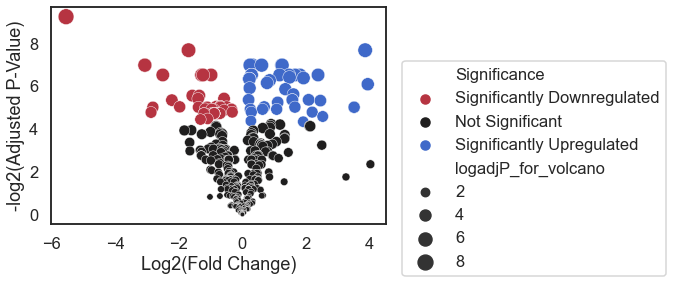

In [9]:
#Volcano Plot

#Try a Seaborn Scatterplot
g = sns.scatterplot(data=sepsis_vs_sham_metabolomics, x="log2FC", y="logadjP_for_volcano", 
                hue="Significance", palette='icefire_r',
                hue_order=("Significantly Downregulated", "Not Significant", "Significantly Upregulated"),
                size='logadjP_for_volcano', sizes=(20, 250),
                #size_order=('Regular', 'Leu/Gln Channeling'),
               )
g.set_xlabel("Log2(Fold Change)") 
g.set_ylabel("-log2(Adjusted P-Value)")
plt.legend(bbox_to_anchor=(1.05, 0.75), borderaxespad=0)
#g.set_title("Volcano Plot of Differentially Expressed Metabolites")
#plt.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/metabolomics_volcano.svg', dpi=300, bbox_inches='tight')

In [10]:
#Bring together dataframes for Heatmap with significant metabolites using merge with just Compound, condition, and individual values

#Subset the significant values
significant_metabolites = sepsis_vs_sham_metabolomics[sepsis_vs_sham_metabolomics['p_bh_corrected'] < 0.05]

significant_metabolites_list = significant_metabolites[0].tolist()

#kibbeymetabolomics #has individual values
#sepsis_vs_sham_metabolomics # has significant values
significant_ind_values = kibbeymetabolomics[kibbeymetabolomics['Unnamed: 0'].isin(significant_metabolites_list)]

#Set index to Compound
significant_ind_values = significant_ind_values.set_index('Unnamed: 0')

#Pop Function for Condition

/Users/brooksleitner/opt/anaconda3/envs/sepsismetabolism/lib/python3.9/site-packages/seaborn/matrix.py:1203: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


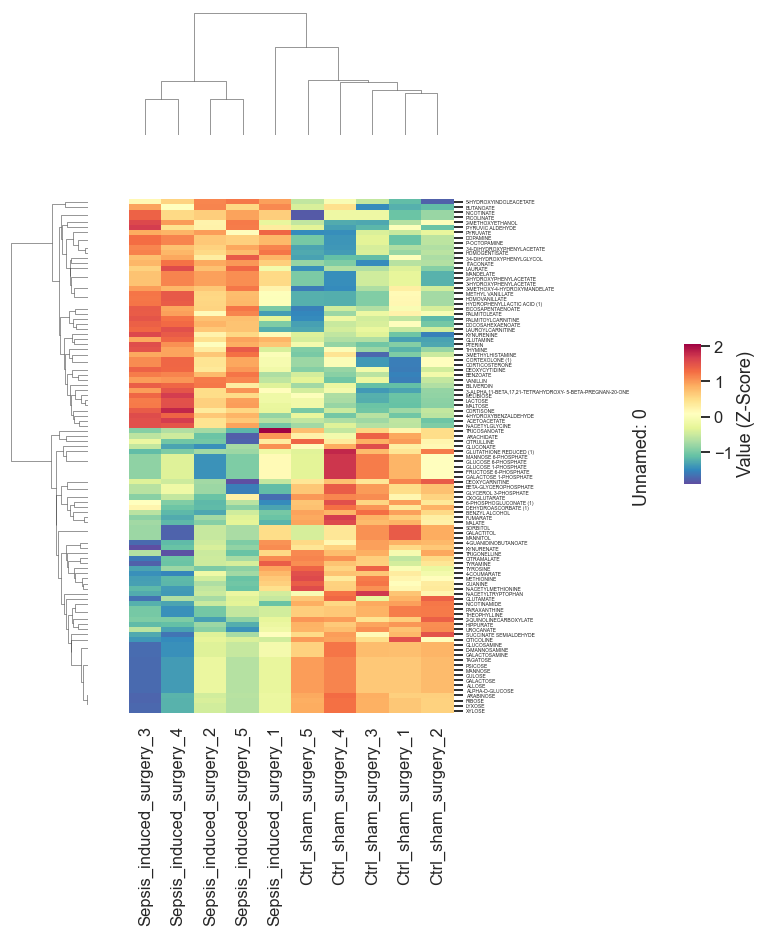

In [11]:
#Heatmap

#lut = dict(zip(condition.unique(), sns.hls_palette(len(set(condition)), l=0.5, s=0.8)))
#row_colors = condition.map(lut)
g = sns.clustermap(significant_ind_values, z_score=0, figsize=(8, 13),
                   cbar_pos=(1.3, 0.37, .03, 0.15),
                   cbar_kws={"label" : "Value (Z-Score)"},
                   #row_colors=row_colors, 
                   cmap='Spectral_r',
                   yticklabels=True)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 5)
#for label in condition.unique():
g.ax_col_dendrogram.bar(0, 0, #color=lut[label],
                            #label=label, 
                            linewidth=0)
g.ax_col_dendrogram.legend(bbox_to_anchor=(1, -1), loc='lower right', borderaxespad=0, ncol=1)
#g.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/untargeted_metabolomics_clustermap.svg', bbox_inches="tight", dpi=300)

# Barplots with Metabolite Pathways

In [32]:
stress_inflammation = ['DOPAMINE', 'ITACONATE', 'CORTICOSTERONE', 'CORTISONE', 'BILIVERDIN', '3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PREGNAN-20-ONE']

stress_df = sepsis_vs_sham_metabolomics[sepsis_vs_sham_metabolomics[0].isin(stress_inflammation)]
stress_df

0          t         p  \
203                                          ITACONATE  10.500126  0.000028   
137                                           DOPAMINE   7.120885  0.000190   
16   3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   5.700120  0.000742   
78                                          BILIVERDIN   6.086556  0.001323   
95                                      CORTICOSTERONE   4.245961  0.005081   
96                                           CORTISONE   4.874825  0.010734   

     sepsis_mean  sham_mean    log2FC  p_bh_corrected  \
203   -11.402192 -15.270593  3.868401        0.004881   
137    -2.532967  -2.847214  0.314247        0.007927   
16    -11.148809 -13.533474  2.384665        0.010890   
78    -12.451951 -16.402168  3.950217        0.014714   
95     -7.463027 -10.983496  3.520469        0.030998   
96    -13.667661 -16.199282  2.531621        0.041828   

                  Significance  logadjP_for_volcano  
203  Significantly Upregulated             7.678605  
137  Significantly Upregulated             6.979073  
16   Significantly Upregulated             6.520813  
78   Significantly Upregulated             6.086714  
95   Significantly Upregulated             5.011668  
96   Significantly Upregulated             4.579370

In [35]:
carnitines = ['PALMITOYLCARNITINE', 'LAUROYLCARNITINE', 'DEOXYCARNITINE', 'PALMITOLEATE', 'L-CARNITINE', 'O-ACETYLCARNITINE', 'GLUTARYLCARNITINE']
carnitine_df = sepsis_vs_sham_metabolomics[sepsis_vs_sham_metabolomics[0].isin(carnitines)]
carnitine_df

0         t         p  sepsis_mean  sham_mean    log2FC  \
291  PALMITOYLCARNITINE  6.057377  0.000537    -5.603743  -7.419815  1.816072   
214    LAUROYLCARNITINE  5.851064  0.000891    -8.692069 -10.617894  1.925824   
120      DEOXYCARNITINE -4.139713  0.009081    -9.294820  -8.591718 -0.703102   
290        PALMITOLEATE  3.293594  0.013240    -5.903260  -7.820365  1.917105   
207         L-CARNITINE -2.964121  0.036918    -5.981734  -5.156584 -0.825150   
274   O-ACETYLCARNITINE  2.426074  0.052115    -2.886655  -3.145691  0.259036   
168   GLUTARYLCARNITINE  1.060087  0.346159   -12.565671 -13.140439  0.574768   

     p_bh_corrected                 Significance  logadjP_for_volcano  
291        0.010890    Significantly Upregulated             6.520813  
214        0.012023    Significantly Upregulated             6.378045  
120        0.038017  Significantly Downregulated             4.717225  
290        0.049551    Significantly Upregulated             4.334933  
207        0.102610              Not Significant             3.284752  
274        0.127092              Not Significant             2.976052  
168        0.451201              Not Significant             1.148158

In [15]:
carbohydrates = ['PYRUVATE', 'LACTOSE', 'SORBITOL', 'GLUCOSAMINE', 'GLUCONATE', 'RIBOSE', 'GLUCOSE 6-PHOSPHATE', 'GALACTOSE']
carbohydrates_df = sepsis_vs_sham_metabolomics[sepsis_vs_sham_metabolomics[0].isin(carbohydrates)]
carbohydrates_df

0         t         p  sepsis_mean  sham_mean  \
212              LACTOSE  6.956194  0.000243   -12.730126 -13.982816   
156            GLUCONATE -4.614107  0.002476    -9.428815  -8.851786   
313             PYRUVATE  4.561779  0.002750    -7.810894  -8.007998   
322               RIBOSE -5.748928  0.004967   -11.733314 -11.041076   
330             SORBITOL -3.856097  0.006243   -13.592063 -13.247648   
159          GLUCOSAMINE -5.280109  0.007970    -7.703556  -6.824380   
163  GLUCOSE 6-PHOSPHATE -3.733563  0.009006   -12.663744 -11.877241   
152            GALACTOSE -5.245463  0.009575    -5.541655  -4.652140   

       log2FC  p_bh_corrected                 Significance  \
212  1.252690        0.007927    Significantly Upregulated   
156 -0.577029        0.023394  Significantly Downregulated   
313  0.197104        0.024366    Significantly Upregulated   
322 -0.692238        0.030998  Significantly Downregulated   
330 -0.344415        0.033099  Significantly Downregulated   
159 -0.879176        0.037657  Significantly Downregulated   
163 -0.786502        0.038017  Significantly Downregulated   
152 -0.889516        0.038017  Significantly Downregulated   

     logadjP_for_volcano  
212             6.979073  
156             5.417733  
313             5.358958  
322             5.011668  
330             4.917062  
159             4.730920  
163             4.717225  
152             4.717225

In [21]:
aminoacids = ['ALANINE', 'ARGININE','ASPARAGINE', 'ASPARTATE', 'CYSTEINE', 'CYSTINE', 'GLUTAMATE', 'GLUTAMINE', 'GLYCINE', 'HISTIDINE', 'ISOLEUCINE', 'LEUCINE', 'LYSINE', 'PHENYLALANINE', 'PROLINE','THREONINE','SERINE','TRYPTOPHAN', 'TYROSINE', 'METHIONINE', 'VALINE']
aminoacids_df = sepsis_vs_sham_metabolomics[sepsis_vs_sham_metabolomics[0].isin(aminoacids)]
aminoacids_df

0         t         p  sepsis_mean  sham_mean    log2FC  \
166      GLUTAMINE  6.869358  0.000252    -5.465944  -6.073204  0.607260   
230     METHIONINE -4.835605  0.002197    -6.541203  -5.184588 -1.356615   
165      GLUTAMATE -4.024395  0.005144   -10.870075  -9.486374 -1.383700   
361       TYROSINE -4.554637  0.006604    -4.453285  -3.875366 -0.577919   
296  PHENYLALANINE  2.874493  0.032954    -2.830354  -3.185755  0.355401   
305        PROLINE -2.361995  0.058042    -8.812670  -8.138339 -0.674331   
371         VALINE -1.981453  0.088974    -5.301999  -5.068229 -0.233770   
359     TRYPTOPHAN -1.922742  0.119282    -4.080881  -3.638132 -0.442748   
218         LYSINE -1.591224  0.158052    -8.901342  -8.461470 -0.439873   
103        CYSTINE -1.617290  0.165555   -13.748784 -13.022238 -0.726546   
215        LEUCINE -1.572254  0.175940    -3.884422  -3.757068 -0.127354   
328         SERINE -1.476783  0.183682   -10.996968 -10.632864 -0.364104   
70      ASPARAGINE  1.332911  0.224317    -9.048317  -9.549974  0.501656   
184      HISTIDINE  1.166091  0.295446    -7.394363  -7.675685  0.281322   
68        ARGININE -1.089175  0.315074    -6.785568  -6.619936 -0.165633   
173        GLYCINE -1.030613  0.337054   -12.934995 -12.690460 -0.244535   
347      THREONINE  1.052767  0.337749   -11.161894 -11.356975  0.195081   
202     ISOLEUCINE -0.566116  0.590437    -4.995169  -4.945319 -0.049851   
71       ASPARTATE -0.394687  0.706500   -12.947996 -12.869726 -0.078270   
102       CYSTEINE -0.216421  0.835658   -15.212435 -15.070116 -0.142319   

     p_bh_corrected                 Significance  logadjP_for_volcano  
166        0.007927    Significantly Upregulated             6.979073  
230        0.021295  Significantly Downregulated             5.553343  
165        0.030998  Significantly Downregulated             5.011668  
361        0.034194  Significantly Downregulated             4.870132  
296        0.095090              Not Significant             3.394564  
305        0.134175              Not Significant             2.897814  
371        0.169895              Not Significant             2.557285  
359        0.212682              Not Significant             2.233232  
218        0.265528              Not Significant             1.913067  
103        0.275682              Not Significant             1.858925  
215        0.288702              Not Significant             1.792347  
328        0.296788              Not Significant             1.752495  
70         0.333965              Not Significant             1.582233  
184        0.409079              Not Significant             1.289550  
68         0.427396              Not Significant             1.226355  
173        0.441761              Not Significant             1.178661  
347        0.441761              Not Significant             1.178661  
202        0.690134              Not Significant             0.535051  
71         0.772418              Not Significant             0.372547  
102        0.875011              Not Significant             0.192628

In [28]:
nad_metabolism = ['TRYPTOPHAN', 'KYNURENINE', 'NICOTINAMIDE', '2-QUINOLINECARBOXYLATE', 'PICOLINATE']
nad_metabolism_df = sepsis_vs_sham_metabolomics[sepsis_vs_sham_metabolomics[0].isin(nad_metabolism)]
nad_metabolism_df

0         t         p  sepsis_mean  sham_mean  \
13   2-QUINOLINECARBOXYLATE -9.860162  0.000039   -14.898216 -13.202345   
302              PICOLINATE  4.675196  0.002901   -12.801025 -14.374292   
266            NICOTINAMIDE -6.358318  0.002998   -10.020024  -7.799253   
205              KYNURENINE  4.254528  0.006024   -10.234332 -10.868924   
359              TRYPTOPHAN -1.922742  0.119282    -4.080881  -3.638132   

       log2FC  p_bh_corrected                 Significance  \
13  -1.695871        0.004881  Significantly Downregulated   
302  1.573267        0.024366    Significantly Upregulated   
266 -2.220771        0.024634  Significantly Downregulated   
205  0.634592        0.033099    Significantly Upregulated   
359 -0.442748        0.212682              Not Significant   

     logadjP_for_volcano  
13              7.678605  
302             5.358958  
266             5.343224  
205             4.917062  
359             2.233232

In [37]:
ureacycle = ['BENZOATE', 'HIPPURATE', 'N-ACETYLGLUTAMATE', 'CITRULLINE', 'L-ORNITHINE', 'OROTATE']
ureacycle_df = sepsis_vs_sham_metabolomics[sepsis_vs_sham_metabolomics[0].isin(ureacycle)]
ureacycle_df

0          t         p  sepsis_mean  sham_mean    log2FC  \
183          HIPPURATE -16.013549  0.000004   -11.658956  -6.104311 -5.554645   
73            BENZOATE   6.865827  0.000737    -7.222801  -8.396192  1.173392   
93          CITRULLINE  -4.688443  0.004356    -8.779305  -8.283699 -0.495607   
210        L-ORNITHINE  -4.461443  0.016229   -11.399428 -10.570503 -0.828925   
247  N-ACETYLGLUTAMATE  -1.456494  0.218367    -9.793990  -9.264178 -0.529811   
282            OROTATE  -0.676860  0.541841   -12.940312 -12.742128 -0.198184   

     p_bh_corrected                 Significance  logadjP_for_volcano  
183        0.001647  Significantly Downregulated             9.246148  
73         0.010890    Significantly Upregulated             6.520813  
93         0.030645  Significantly Downregulated             5.028216  
210        0.057331              Not Significant             4.124539  
247        0.328624              Not Significant             1.605492  
282        0.646107              Not Significant             0.630155

In [40]:
tca_cycle = ['CITRATE', 'ISOCITRATE', 'SUCCINATE', 'MALATE', 'FUMARATE', 'OXOGLUTARATE']
tca_cycle_df = sepsis_vs_sham_metabolomics[sepsis_vs_sham_metabolomics[0].isin(tca_cycle)]
tca_cycle_df

0         t         p  sepsis_mean  sham_mean    log2FC  \
220        MALATE -6.062959  0.000509    -7.431895  -6.149293 -1.282602   
148      FUMARATE -5.718036  0.000729   -12.323899 -11.041529 -1.282370   
284  OXOGLUTARATE -3.874336  0.011692    -8.934523  -7.842261 -1.092263   
92        CITRATE -4.065901  0.019500    -5.766695  -3.940325 -1.826370   
337     SUCCINATE -2.276826  0.087167    -7.740869  -6.589832 -1.151037   
201    ISOCITRATE -1.415380  0.237215   -10.040238  -9.431819 -0.608419   

     p_bh_corrected                 Significance  logadjP_for_volcano  
220        0.010890  Significantly Downregulated             6.520813  
148        0.010890  Significantly Downregulated             6.520813  
284        0.045096  Significantly Downregulated             4.470863  
92         0.065814              Not Significant             3.925464  
337        0.169895              Not Significant             2.557285  
201        0.347548              Not Significant             1.524715

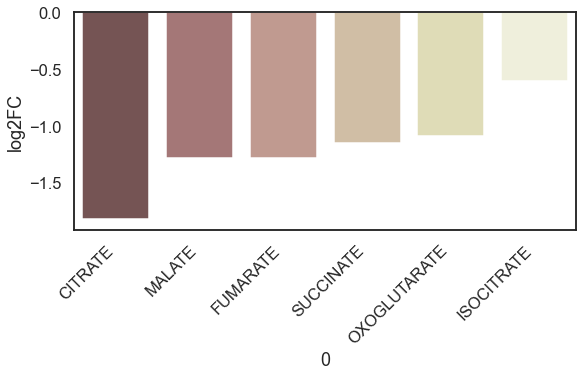

In [42]:
plt.figure(figsize = (9,4))
g = sns.barplot(data = tca_cycle_df.sort_values('log2FC'), x = 0, y = 'log2FC', palette='pink')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/tca_cycle_barplot.svg', dpi=300, bbox_inches='tight')

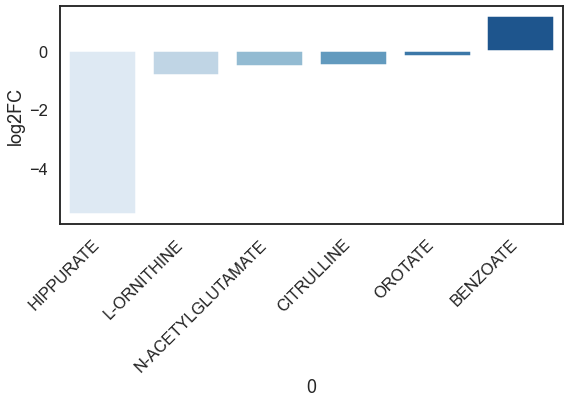

In [39]:
plt.figure(figsize = (9,4))
g = sns.barplot(data = ureacycle_df.sort_values('log2FC'), x = 0, y = 'log2FC', palette='Blues')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/ureacycle_barplot.svg', dpi=300, bbox_inches='tight')

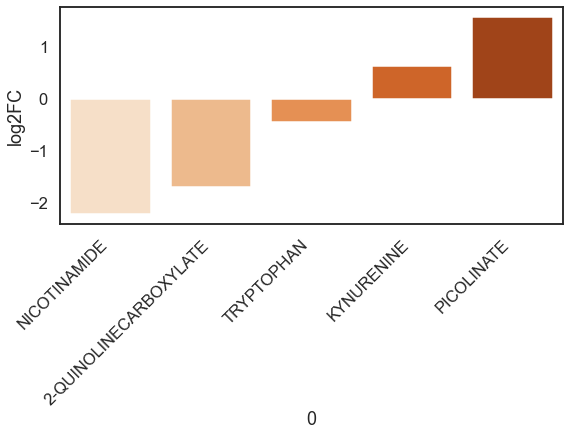

In [30]:
plt.figure(figsize = (9,4))
g = sns.barplot(data = nad_metabolism_df.sort_values('log2FC'), x = 0, y = 'log2FC', palette='Oranges')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/nad_metabolism_barplot.svg', dpi=300, bbox_inches='tight')

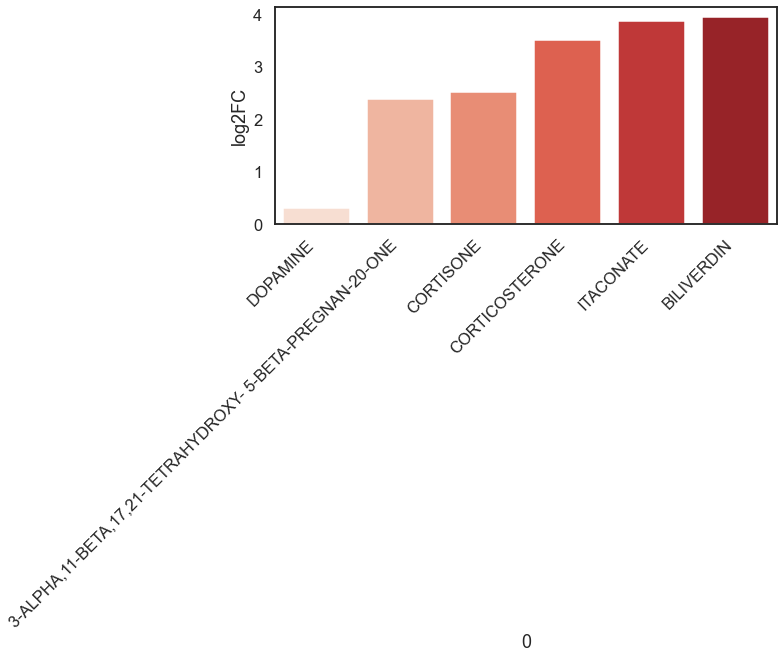

In [31]:
plt.figure(figsize = (9,4))
g = sns.barplot(data = stress_df.sort_values('log2FC'), x = 0, y = 'log2FC', palette='Reds')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/stress_inflammation_barplot.svg', dpi=300, bbox_inches='tight')

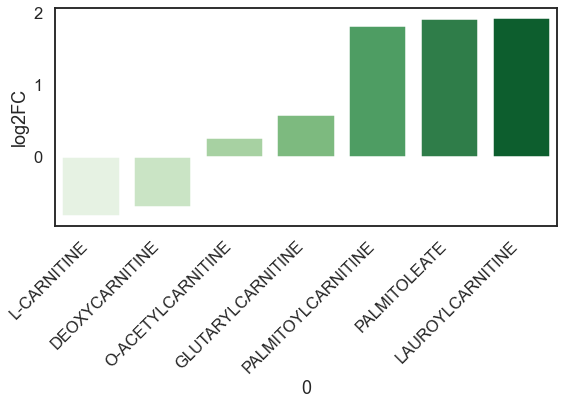

In [36]:
plt.figure(figsize = (9,4))
g = sns.barplot(data = carnitine_df.sort_values('log2FC'), x = 0, y = 'log2FC', palette='Greens')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/carnitines_barplot.svg', dpi=300, bbox_inches='tight')

[Text(0, 0, 'GALACTOSE'),
 Text(1, 0, 'GLUCOSAMINE'),
 Text(2, 0, 'GLUCOSE 6-PHOSPHATE'),
 Text(3, 0, 'RIBOSE'),
 Text(4, 0, 'GLUCONATE'),
 Text(5, 0, 'SORBITOL'),
 Text(6, 0, 'PYRUVATE'),
 Text(7, 0, 'LACTOSE')]

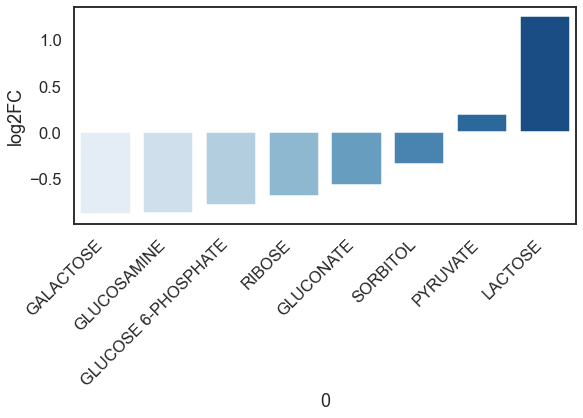

In [19]:
plt.figure(figsize = (9,4))
g = sns.barplot(data = carbohydrates_df.sort_values('log2FC'), x = 0, y = 'log2FC', palette='Blues')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/carbohydrates_barplot.svg', dpi=300, bbox_inches='tight')

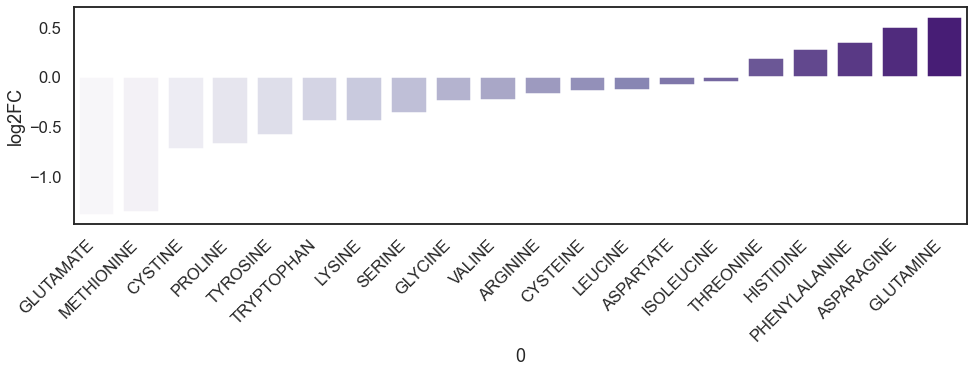

In [25]:
plt.figure(figsize = (16,4))
g = sns.barplot(data = aminoacids_df.sort_values('log2FC'), x = 0, y = 'log2FC', palette='Purples')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/aminoacids_barplot.svg', dpi=300, bbox_inches='tight')

In [43]:
aminoacids_df

0         t         p  sepsis_mean  sham_mean    log2FC  \
166      GLUTAMINE  6.869358  0.000252    -5.465944  -6.073204  0.607260   
230     METHIONINE -4.835605  0.002197    -6.541203  -5.184588 -1.356615   
165      GLUTAMATE -4.024395  0.005144   -10.870075  -9.486374 -1.383700   
361       TYROSINE -4.554637  0.006604    -4.453285  -3.875366 -0.577919   
296  PHENYLALANINE  2.874493  0.032954    -2.830354  -3.185755  0.355401   
305        PROLINE -2.361995  0.058042    -8.812670  -8.138339 -0.674331   
371         VALINE -1.981453  0.088974    -5.301999  -5.068229 -0.233770   
359     TRYPTOPHAN -1.922742  0.119282    -4.080881  -3.638132 -0.442748   
218         LYSINE -1.591224  0.158052    -8.901342  -8.461470 -0.439873   
103        CYSTINE -1.617290  0.165555   -13.748784 -13.022238 -0.726546   
215        LEUCINE -1.572254  0.175940    -3.884422  -3.757068 -0.127354   
328         SERINE -1.476783  0.183682   -10.996968 -10.632864 -0.364104   
70      ASPARAGINE  1.332911  0.224317    -9.048317  -9.549974  0.501656   
184      HISTIDINE  1.166091  0.295446    -7.394363  -7.675685  0.281322   
68        ARGININE -1.089175  0.315074    -6.785568  -6.619936 -0.165633   
173        GLYCINE -1.030613  0.337054   -12.934995 -12.690460 -0.244535   
347      THREONINE  1.052767  0.337749   -11.161894 -11.356975  0.195081   
202     ISOLEUCINE -0.566116  0.590437    -4.995169  -4.945319 -0.049851   
71       ASPARTATE -0.394687  0.706500   -12.947996 -12.869726 -0.078270   
102       CYSTEINE -0.216421  0.835658   -15.212435 -15.070116 -0.142319   

     p_bh_corrected                 Significance  logadjP_for_volcano  
166        0.007927    Significantly Upregulated             6.979073  
230        0.021295  Significantly Downregulated             5.553343  
165        0.030998  Significantly Downregulated             5.011668  
361        0.034194  Significantly Downregulated             4.870132  
296        0.095090              Not Significant             3.394564  
305        0.134175              Not Significant             2.897814  
371        0.169895              Not Significant             2.557285  
359        0.212682              Not Significant             2.233232  
218        0.265528              Not Significant             1.913067  
103        0.275682              Not Significant             1.858925  
215        0.288702              Not Significant             1.792347  
328        0.296788              Not Significant             1.752495  
70         0.333965              Not Significant             1.582233  
184        0.409079              Not Significant             1.289550  
68         0.427396              Not Significant             1.226355  
173        0.441761              Not Significant             1.178661  
347        0.441761              Not Significant             1.178661  
202        0.690134              Not Significant             0.535051  
71         0.772418              Not Significant             0.372547  
102        0.875011              Not Significant             0.192628

# Barplots with SEM

In [24]:
#Extract compoound names and individual values

#Transform the data to a more manageable unit: make negative and invert the values, and multiple by 100
normalized_metabolites = (-1/(kibbey_all_metabolites.iloc[:, -10:]))*100
normalized_metabolites['compound'] = kibbey_all_metabolites['compound']
normalized_metabolites

Ctrl_sham_surgery_1  Ctrl_sham_surgery_2  Ctrl_sham_surgery_3  \
0               8.862402             8.723213             8.903097   
1               8.862402             8.723213             8.903097   
2               8.862402             8.723213             8.903097   
3               8.862402             8.723213             8.903097   
4               7.324201             7.633197             7.066526   
..                   ...                  ...                  ...   
373             6.613936             6.679901             6.404376   
374             6.756681             4.231540             6.775401   
375             7.887200             7.328038             7.465068   
376             5.836639             6.180146             5.837053   
377             8.700389             7.312637             9.245973   

     Ctrl_sham_surgery_4  Ctrl_sham_surgery_5  Sepsis_induced_surgery_1  \
0               8.892285             9.314528                  8.889605   
1               8.892285             9.314528                  8.889605   
2               8.892285             9.314528                  8.889605   
3               8.892285             9.314528                  8.889605   
4               7.403811             7.206969                  7.040215   
..                   ...                  ...                       ...   
373             6.524508             6.150843                  6.031572   
374             8.086021             5.552700                  8.988797   
375             7.649060             7.667123                  7.123291   
376             6.574187             6.114748                  6.451364   
377             9.362414             8.294471                  8.809803   

     Sepsis_induced_surgery_2  Sepsis_induced_surgery_3  \
0                    8.931277                  8.318030   
1                    8.931277                  8.318030   
2                    8.931277                  8.318030   
3                    8.931277                  8.318030   
4                    6.873917                  6.550865   
..                        ...                       ...   
373                  7.136698                  6.215717   
374                  8.232068                  7.786978   
375                  7.181837                  6.806104   
376                  8.244444                  8.525630   
377                  8.773899                  8.366002   

     Sepsis_induced_surgery_4  Sepsis_induced_surgery_5  \
0                    8.559863                  8.641758   
1                    8.559863                  8.641758   
2                    8.559863                  8.641758   
3                    8.559863                  8.641758   
4                    6.429029                  6.738656   
..                        ...                       ...   
373                  6.536995                  6.486817   
374                  7.819049                  7.727661   
375                  6.781628                  7.146962   
376                  8.411634                  7.111977   
377                  8.155836                  8.088736   

                   compound  
0              BETA-ALANINE  
1                 D-ALANINE  
2                 L-ALANINE  
3                 SARCOSINE  
4    SUCCINATE SEMIALDEHYDE  
..                      ...  
373             CHOLATE (1)  
374        ALPHA-TOCOPHEROL  
375              CITICOLINE  
376              BILIVERDIN  
377               THYROXINE  

[378 rows x 11 columns]

In [25]:
#Melt the data to long form for a plot

melted_normalized = pd.melt(normalized_metabolites, id_vars=['compound'], value_vars=['Ctrl_sham_surgery_1', 'Ctrl_sham_surgery_2', 'Ctrl_sham_surgery_3', 'Ctrl_sham_surgery_4', 'Ctrl_sham_surgery_5', 'Sepsis_induced_surgery_1', 'Sepsis_induced_surgery_2', 'Sepsis_induced_surgery_3', 'Sepsis_induced_surgery_4', 'Sepsis_induced_surgery_5'])

In [26]:
#Assign conditions to each subject

def condition_setting(variable):
    if 'sham' in variable:
        condition = 'Sham'
    else:
        condition = 'Sepsis'
    return condition

melted_normalized['Condition'] = melted_normalized.apply(lambda x: condition_setting(x['variable']), axis=1)

In [27]:
allaminoacids = ['ALANINE', 'ARGININE','ASPARAGINE', 'ASPARTATE', 'CYSTEINE', 'CYSTINE', 'GLUTAMATE', 'GLUTAMINE', 'GLYCINE', 'HISTIDINE', 'ISOLEUCINE', 'LEUCINE', 'LYSINE', 'PHENYLALANINE', 'PROLINE','THREONINE','SERINE','TRYPTOPHAN', 'TYROSINE', 'METHIONINE', 'VALINE']
allaminoacids_df = melted_normalized[melted_normalized['compound'].isin(allaminoacids)]
allaminoacids_df

compound                  variable      value Condition
10          PROLINE       Ctrl_sham_surgery_1  11.754144      Sham
15           VALINE       Ctrl_sham_surgery_1  18.587970      Sham
18        THREONINE       Ctrl_sham_surgery_1   8.828771      Sham
27           LYSINE       Ctrl_sham_surgery_1  11.114894      Sham
29        HISTIDINE       Ctrl_sham_surgery_1  12.977581      Sham
...             ...                       ...        ...       ...
3653        LEUCINE  Sepsis_induced_surgery_5  26.679020    Sepsis
3664     METHIONINE  Sepsis_induced_surgery_5  15.134387    Sepsis
3681  PHENYLALANINE  Sepsis_induced_surgery_5  33.539006    Sepsis
3696       TYROSINE  Sepsis_induced_surgery_5  22.659433    Sepsis
3712     TRYPTOPHAN  Sepsis_induced_surgery_5  25.364081    Sepsis

[200 rows x 4 columns]

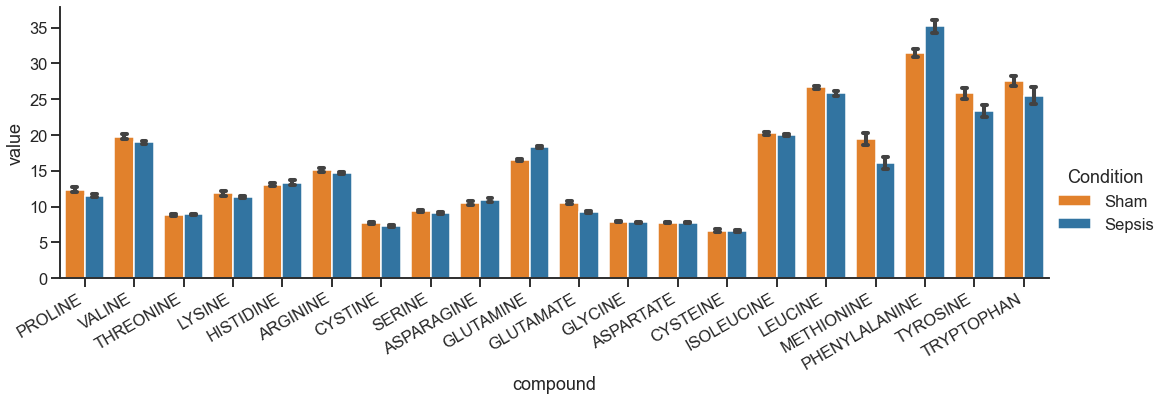

In [28]:
sns.set_style("white")
sns.set_style("ticks")
g = sns.catplot(data = allaminoacids_df, kind="bar", x="compound"
, y="value", hue="Condition", ci=68, capsize=.1, aspect=3, palette = {'Sepsis':'tab:blue', 'Sham':'tab:orange'}, hue_order=['Sham', 'Sepsis'], saturation=0.75
)
g.set_xticklabels(rotation=30, ha='right')
#g.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/plasma_amino_acids.svg', bbox_inches="tight", dpi=300)

Urea Cycle

In [47]:
ureacycle = ['BENZOATE', 'HIPPURATE', 'N-ACETYLGLUTAMATE', 'CITRULLINE', 'L-ORNITHINE', 'OROTATE']
ureacycle_df = melted_normalized[melted_normalized['compound'].isin(ureacycle)]

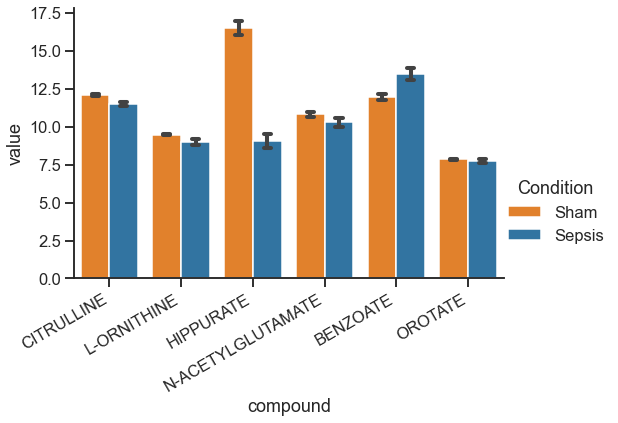

In [48]:
sns.set_style("white")
sns.set_style("ticks")
g = sns.catplot(data = ureacycle_df, kind="bar", x="compound"
, y="value", hue="Condition", ci=68, capsize=.1, aspect=1.5, palette = {'Sepsis':'tab:blue', 'Sham':'tab:orange'}, hue_order=['Sham', 'Sepsis'], saturation=0.75)
g.set_xticklabels(rotation=30, ha='right')
g.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/plasma_urea_cycle.svg', bbox_inches="tight", dpi=300)

NAD Metabolism

In [32]:
nad_metabolism = ['TRYPTOPHAN', 'KYNURENINE', 'NICOTINAMIDE', '2-QUINOLINECARBOXYLATE', 'PICOLINATE']
nad_metabolism_df = melted_normalized[melted_normalized['compound'].isin(nad_metabolism)]

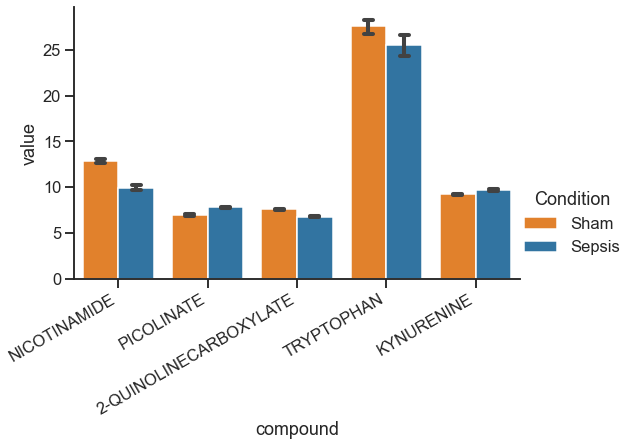

In [34]:
sns.set_style("white")
sns.set_style("ticks")
g = sns.catplot(data = nad_metabolism_df, kind="bar", x="compound"
, y="value", hue="Condition", ci=68, capsize=.1, aspect=1.5, palette = {'Sepsis':'tab:blue', 'Sham':'tab:orange'}, hue_order=['Sham', 'Sepsis'], saturation=0.75)
g.set_xticklabels(rotation=30, ha='right')
g.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/nad_metabolism.svg', bbox_inches="tight", dpi=300)

Stress & Inflammation

In [32]:
all_stress_inflammation = ['DOPAMINE', 'ITACONATE', 'CORTICOSTERONE', 'CORTISONE', 'BILIVERDIN', '3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PREGNAN-20-ONE']
all_stress_inflammation_df = melted_normalized[melted_normalized['compound'].isin(all_stress_inflammation)]
all_stress_inflammation_df

compound  \
77                                             DOPAMINE   
135                                           ITACONATE   
208   3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
361                                      CORTICOSTERONE   
364                                           CORTISONE   
376                                          BILIVERDIN   
455                                            DOPAMINE   
513                                           ITACONATE   
586   3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
739                                      CORTICOSTERONE   
742                                           CORTISONE   
754                                          BILIVERDIN   
833                                            DOPAMINE   
891                                           ITACONATE   
964   3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
1117                                     CORTICOSTERONE   
1120                                          CORTISONE   
1132                                         BILIVERDIN   
1211                                           DOPAMINE   
1269                                          ITACONATE   
1342  3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
1495                                     CORTICOSTERONE   
1498                                          CORTISONE   
1510                                         BILIVERDIN   
1589                                           DOPAMINE   
1647                                          ITACONATE   
1720  3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
1873                                     CORTICOSTERONE   
1876                                          CORTISONE   
1888                                         BILIVERDIN   
1967                                           DOPAMINE   
2025                                          ITACONATE   
2098  3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
2251                                     CORTICOSTERONE   
2254                                          CORTISONE   
2266                                         BILIVERDIN   
2345                                           DOPAMINE   
2403                                          ITACONATE   
2476  3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
2629                                     CORTICOSTERONE   
2632                                          CORTISONE   
2644                                         BILIVERDIN   
2723                                           DOPAMINE   
2781                                          ITACONATE   
2854  3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
3007                                     CORTICOSTERONE   
3010                                          CORTISONE   
3022                                         BILIVERDIN   
3101                                           DOPAMINE   
3159                                          ITACONATE   
3232  3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
3385                                     CORTICOSTERONE   
3388                                          CORTISONE   
3400                                         BILIVERDIN   
3479                                           DOPAMINE   
3537                                          ITACONATE   
3610  3-ALPHA,11-BETA,17,21-TETRAHYDROXY- 5-BETA-PRE...   
3763                                     CORTICOSTERONE   
3766                                          CORTISONE   
3778                                         BILIVERDIN   

                      variable      value Condition  
77         Ctrl_sham_surgery_1  34.693995      Sham  
135        Ctrl_sham_surgery_1   6.807071      Sham  
208        Ctrl_sham_surgery_1   7.049630      Sham  
361        Ctrl_sham_surgery_1   7.852357      Sham  
364        Ctrl_sham_surgery_1   6.172336      Sham  
376        Ctrl_sham_surgery_1   5.836639      Sham  
455        Ctrl_sham_surgery_2  35.765687      Sham  
513        Ctrl

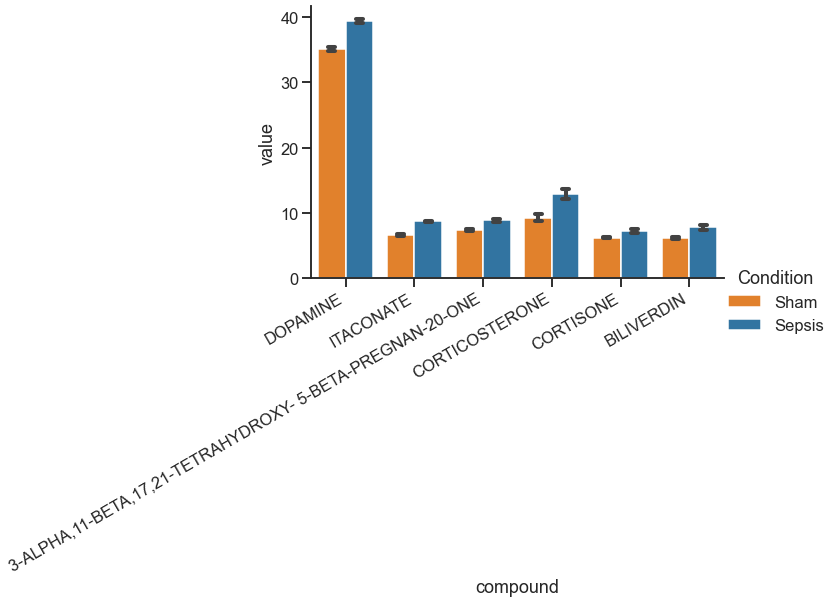

In [35]:
sns.set_style("white")
sns.set_style("ticks")
g = sns.catplot(data = all_stress_inflammation_df, kind="bar", x="compound"
, y="value", hue="Condition", ci=68, capsize=.1, aspect=1.5, palette = {'Sepsis':'tab:blue', 'Sham':'tab:orange'}, hue_order=['Sham', 'Sepsis'], saturation=0.75)
g.set_xticklabels(rotation=30, ha='right')
g.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/plasma_stress_inflammation.svg', bbox_inches="tight", dpi=300)

Carnitines

In [36]:
all_carnitines_df = melted_normalized[melted_normalized['compound'].str.contains('carnitine', case=False)]

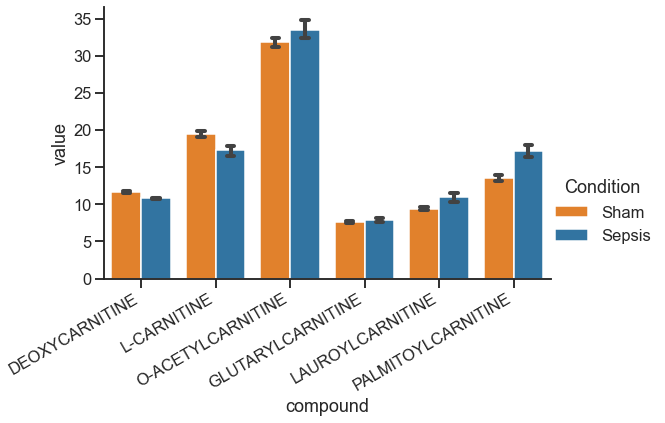

In [38]:
sns.set_style("white")
sns.set_style("ticks")
g = sns.catplot(data = all_carnitines_df, kind="bar", x="compound"
, y="value", hue="Condition", ci=68, capsize=.1, aspect=1.5, palette = {'Sepsis':'tab:blue', 'Sham':'tab:orange'}, hue_order=['Sham', 'Sepsis'], saturation=0.75)
g.set_xticklabels(rotation=30, ha='right')
g.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/plasma_carnitines.svg', bbox_inches="tight", dpi=300)

TCA Cycle

In [40]:
tca_cycle = ['CITRATE', 'ISOCITRATE', 'SUCCINATE', 'MALATE', 'FUMARATE', 'OXOGLUTARATE']
tca_cycle_df = melted_normalized[melted_normalized['compound'].isin(tca_cycle)]

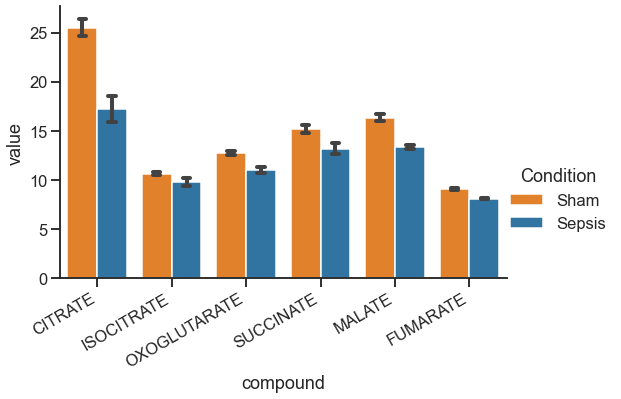

In [42]:
sns.set_style("white")
sns.set_style("ticks")
g = sns.catplot(data = tca_cycle_df, kind="bar", x="compound"
, y="value", hue="Condition", ci=68, capsize=.1, aspect=1.5, palette = {'Sepsis':'tab:blue', 'Sham':'tab:orange'}, hue_order=['Sham', 'Sepsis'], saturation=0.75, order=['CITRATE', 'ISOCITRATE', 'OXOGLUTARATE', 'SUCCINATE', 'MALATE', 'FUMARATE'])
g.set_xticklabels(rotation=30, ha='right')
g.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/plasma_tca_cycle_intermediates.svg', bbox_inches="tight", dpi=300)

# Metabolic Map Figure

In [30]:
sns.catplot(
    data=melted_normalized, x='Condition', y='value',
    col='compound', kind='box', col_wrap=8, sharey=False, order=["Sepsis", "Sham"]
    )

plt.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/metabolomics_facetgrid.svg', dpi=300, bbox_inches='tight')